# Artificial Intelligence CA2
- Lecturer: David McQuaid
- Student Name: Danrlei da Silva Martins
- Student Number: 2020322
- GitHub Repository: https://github.com/danrlei-martins-cct/AI_Lv8_CA2

***

## Question I

A puzzle has multiple ways of reaching the end solution. Fig. 1 shows a graph that represents all possible routes to the solution. The starting point of the game is represented by A, the solution is represented by S. The other points in the graph are possible intermediary stages.

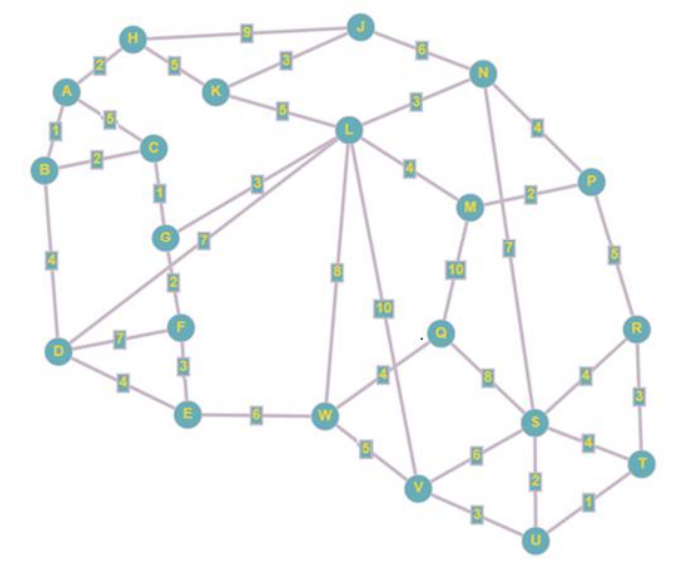  

### (a) The graph in Fig. 1 is a visualisation of the problem. 

### (i) Identify the differences between a graph and a tree

In a formal sense, a **graph** consists of a set of vertices (V) and a set of edges (E). Each edge is represented by an unordered pair of vertices (vi, vj), which are elements of the vertex set V (Hamilton, 2020, p. 2). Particularly, a graph represents a collection of points and how they are interconnected (Wilson, 1996, p. 2). This fundamental principle in graph theory is often used to illustrate relationships between different entities or objects (Deo, 2016, p. 3).

A **tree** is a connected graph containing no cycles (Wilson, 1996, p. 43). In other words, it is a graph with only one path between each pair of vertices, and it has no loops or cycles (Deo, 2016, p. 45). A tree is a particular kind of graph with unique characteristics. Though not all graphs are trees, a graph is always a tree.

The main differences are in regards to:

- **Connectivity**  
    - Graphs can be connected at any degree (Deo, 2016).
    - Trees are never isolated. Any two vertices form a connected graph since there is a single path connecting them (Gould, 2016).  
- **Cycles**  
    - Cycles, or loops in the structure, are a possible feature of graphs (Wilson, 1996).
    - Trees have no cycles (Deo, 2016). Therefore, they are acyclic.
- **Number of Edges**
    - There is no limitation on the number of edges in a graph.
    - There is a fixed number of edges in a tree. It has precisely _n-1_ edges if it has _n_ vertices (Deo, 2016).
- **Rooted Structure**
    - Graphs may not have a single node that acts as a root. Any node might serve as the beginning point of a traversal, depending on the method or context being applied.
    - Trees often have a root node (e.g. rooted trees) from which all other nodes are reachable.

### (ii) Explain in detail how the graph is an abstraction of the problem

If a problem can be represented and examined as a graph structure, then the problem can be abstracted into a graph. Holte _et al._ (1996) proposed that solving a problem can be thought of as tracing a path in a graph between two specified nodes. Put another way, the problem can be conceptualized as a graph, in which the nodes stand for different problem states and the edges for changes between those states. Beamer III (2016) states that graph abstraction is a way to model the connections between objects.   

The graph presented in Fig. 1 **represents a problem** in which the objective is to identify the shortest route between point A (the initial point) and point S (the final point). Each point constitutes an intermediate stage, and the links between points represent the potential routes between those stages. The objective relates to **path-finding**, which is the process of determining a graph's shortest path between two specified nodes (Holte _et al._, 1996).  

The graph abstraction offers a means of presenting the problem in a more structured and organised way, which can result in more effective and efficient problem solutions.

### (iii) Identify the advantages of using a visualisation such as the one shown in Fig. 1

Graphs provide a **visual representation of the problem**. Visualization can be defined as _"the ability, the process and the product of creation, interpretation, use of and reflection upon pictures, images, diagrams, in our minds, on paper or with technological tools, with the purpose of depicting and communicating information, thinking about and developing previously unknown ideas and advancing understandings_." (Arcani, 2003, p. 26).

Therefore, visualization helps us to understand a problem better and create a plan for solving it (Piggott and Woodham, 2008). Furthermore, it makes it easier for problem solvers to understand the relationships between different states or stages. Other advantages include:
1. **Clarity**: Simplifies the problem into a set of nodes and edges, which makes it easier to comprehend and solve.
2. **Path Exploration**: It allows us to explore multiple paths and compare them visually. Particularly useful for path-finding problems such as finding the shortest path in a network (Holte _et al._, 1996).
3. **Route Optimization**: Easier to identify the shortest path and evaluate alternative routes.
4. **Decision Support**: It helps in making informed decisions about which path to take.

***

### (b) Demonstrate how Dijkstra’s algorithm would find the shortest path to the solution in Fig.1 through diagrams and written explanation of each stage


In [1]:
# Import required libraries
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
# Graph data based on Fig. 1
graph_data = {
    'A': {'B': 1, 'C': 5, 'H': 2},
    'B': {'C': 2, 'D': 4},
    'C': {'A': 5, 'B': 2, 'G': 1},
    'D': {'B': 4, 'E': 4, 'F': 7, 'L': 7},
    'E': {'D': 4, 'F': 3, 'W': 6},
    'F': {'D': 7, 'E': 3, 'G': 2},
    'G': {'C': 1, 'F': 2, 'L': 3},
    'H': {'A': 2, 'J': 9, 'K': 5},
    'J': {'H': 9, 'K': 3, 'N': 6},
    'K': {'H': 5, 'J': 3, 'L': 5},
    'L': {'D': 7, 'G': 3, 'K': 5, 'N': 3, 'M': 4, 'V': 10, 'W': 8},
    'M': {'L': 4, 'P': 2, 'Q': 10},
    'N': {'J': 6, 'L': 3, 'P': 4, 'S': 7},
    'P': {'M': 2, 'N': 4, 'R': 5},
    'Q': {'M': 10, 'S': 8, 'W': 4},
    'R': {'P': 5, 'S': 4, 'T': 3},
    'S': {'Q': 8, 'R': 4, 'T': 4, 'U': 2, 'V': 6},
    'T': {'R': 3, 'S': 4, 'U': 1},
    'U': {'S': 2, 'T': 1, 'V': 3},
    'V': {'L': 10, 'S': 6, 'U': 3, 'W': 5},
    'W': {'E': 6, 'L': 8, 'Q': 4, 'V': 5}
}

In [187]:
# Create a graph
G = nx.Graph()

In [188]:
# Add nodes and edges
for node, neighbors in graph_data.items():
    G.add_node(node)
    for neighbor, weight in neighbors.items():
        G.add_edge(node, neighbor, weight=weight)

In [189]:
# Define custom node positions to adjust according to Fig. 1
custom_node_positions = {
    'A': (0.1, 3),
    'B': (-0.4, 1),
    'C': (1.1, 2),
    'D': (-0.1, -4),
    'E': (1, -7),
    'F': (1.1, -4),
    'G': (1.1, -1.2),
    'H': (1, 5),
    'J': (4, 5),
    'K': (2.2, 3.4),
    'L': (3.8, 1.8),
    'M': (4.8, -1.5),
    'N': (5.3, 2.5),
    'P': (6.6, -1),
    'Q': (4.2, -4.5),
    'R': (6.8, -4),
    'S': (5.5, -6),
    'T': (7, -8.2),
    'U': (5.7, -10),
    'V': (4, -9),
    'W': (2.7, -7.6),
}

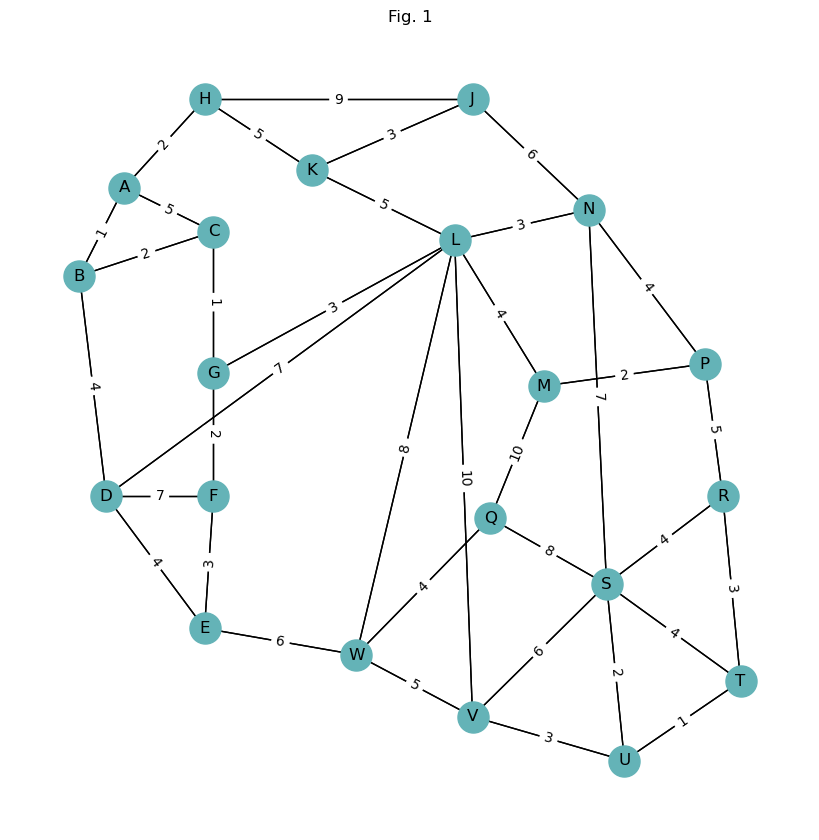

In [191]:
# Draw the graph to represent Fig. 1
plt.figure(figsize=(8, 8))
labels = nx.get_edge_attributes(G, 'weight')
pos = custom_node_positions

nx.draw(G, pos, with_labels=True, node_size=500, node_color='#64b3b7')
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.title("Fig. 1")
plt.axis("off")
plt.show();

In [6]:
# Use NetworkX to find the shortest path using Dijkstra's algorithm
shortest_path = nx.shortest_path(G, source='A', target='S', weight='weight')
print(f"Shortest path from A to S: {shortest_path}")

# Length of the shortest path from node A to node S.
length = nx.shortest_path_length(G, source='A', target='S', weight="weight")
print("Length of the shortest path: ", length)

Shortest path from A to S: ['A', 'B', 'C', 'G', 'L', 'N', 'S']
Length of the shortest path:  17


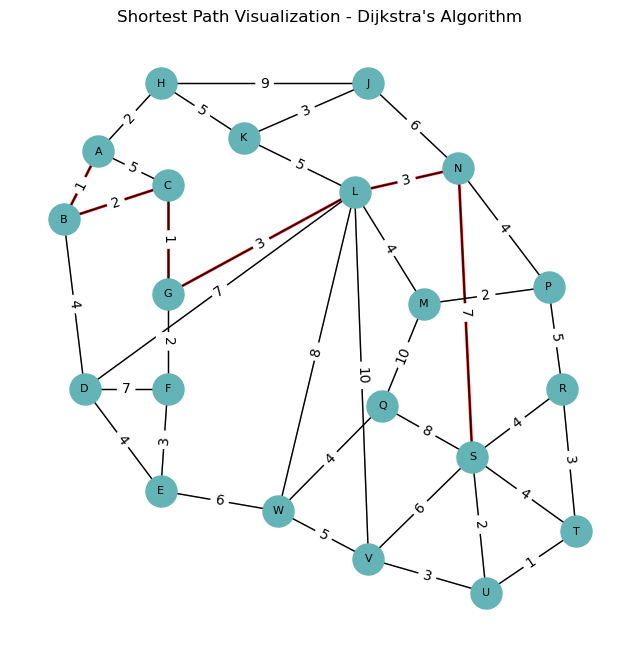

In [194]:
# Draw the graph
plt.figure(figsize=(8, 8))
labels = nx.get_edge_attributes(G, 'weight')
pos = custom_node_positions

# Draw all edges in light gray
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), edge_color='#bfb5be')

# Highlight the shortest path in red
nx.draw_networkx_edges(G, pos, edgelist=[(shortest_path[i], shortest_path[i + 1]) for i in range(len(shortest_path) - 1)],
                       edge_color='red', width=2)

# Draw nodes and edge labels
nx.draw(G, pos, with_labels=True, node_size=500, node_color='#64b3b7', font_size=8, font_color='black')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='black')

plt.title("Shortest Path Visualization - Dijkstra's Algorithm")
plt.axis("off")
plt.show();

## References
Arcavi, A. (2003). _The role of visual representations in the learning of mathematics_. Educational Studies in Mathematics, [online] 52, pp.215–241. doi:https://doi.org/10.1023/A:1024312321077  (Accessed: 08 November 2023).  
Beamer III, S. (2016). _Understanding and Improving Graph Algorithm Performance_. University of California, Berkeley. [Dissertation] pp.5–6. Available at: https://www2.eecs.berkeley.edu/Pubs/TechRpts/2016/EECS-2016-153.html (Accessed 7 November 2023).  
Deo, N. (2016) _Graph Theory: With Applications to Engineering & Computer Science_. Mineola, New York: Dover Publications. Available at: https://www.shahucollegelatur.org.in/Department/Studymaterial/sci/it/BCS/FY/book.pdf (Accessed: 04 November 2023).   
Gould, R. (2012) _Graph Theory_. Mineola, New York: Dover Publications.  
Hamilton, W.L. (2020) _Graph Representation Learning_. Morgan & Claypool Publishers. Available at: https://www.cs.mcgill.ca/~wlh/grl_book/files/GRL_Book.pdf (Accessed: 05 November 2023).  
Holte, R.C., Mkadmi, T., Zimmer, R.M. and MacDonald, A.J. (1996). _Speeding up problem-solving by abstraction: a graph oriented approach_. Artificial Intelligence, 85(1-2), pp.321–361. doi:https://doi.org/10.1016/0004-3702(95)00111-5. (Accessed: 07 November 2023).   
NetworkX (2023). _Introduction — NetworkX 2.8.2 documentation_. [online] Available at: https://networkx.org/documentation/stable/reference/introduction.html. (Accessed: 09 November 2023).  
Piggott , J. and Woodham, L. (2008). _Thinking Through, and By, Visualising_. Mathematics Teaching: Association of Teachers of Mathematics, [online] 207. Available at: https://nrich.maths.org/6447 (Accessed: 08 November 2023).  
Wilson, R.J. (1996) _Introduction to Graph Theory_. 4th ed. Harlow, United Kingdom: Addison Wesley. Available at: https://www.maths.ed.ac.uk/~v1ranick/papers/wilsongraph.pdf (Accessed: 03 November 2023).  